# 1 ) توالی بین دوربین ها

In [2]:
import pandas as pd

# خواندن دیتاست
df = pd.read_csv('Data_p1.csv')

# محاسبه زمان نسبی از صفر
df['RELATIVE_TIME'] = df['PASSDATETIME'] - df['PASSDATETIME'].min()

# مرتب‌سازی بر اساس زمان نسبی به صورت صعودی
df_sorted = df.sort_values('RELATIVE_TIME', ascending=True)

# انتخاب 50 تا از داده‌های مرتب شده
df_subset = df_sorted.head(50)

# گروه‌بندی بر اساس شناسه ماشین
grouped = df_subset.groupby('vehicleId')

# نمایش زوج‌های مرتب براساس شناسه ماشین و تکرارهای آن
for group, data in grouped:
    vehicle_id = group
    print(f"Vehicle ID: {vehicle_id}")
    
    # تعداد تکرارهای شناسه ماشین
    count = data.shape[0]
    print(f"Count: {count}")
    
    # نمایش زمان و شناسه حسگر
    for index, row in data.iterrows():
        passdatetime_id = row['PASSDATETIME']
        device_id = row['DEVICEID']
        print(f"PASSDATETIME ID: {passdatetime_id}, Device ID: {device_id}")

    print()


Vehicle ID: 13541563120
Count: 1
PASSDATETIME ID: 2, Device ID: 96976

Vehicle ID: 14804931257
Count: 1
PASSDATETIME ID: 2, Device ID: 1566

Vehicle ID: 15421041157
Count: 1
PASSDATETIME ID: 3, Device ID: 73484

Vehicle ID: 15592674597
Count: 1
PASSDATETIME ID: 0, Device ID: 80022

Vehicle ID: 16490799953
Count: 1
PASSDATETIME ID: 2, Device ID: 96388

Vehicle ID: 17220422534
Count: 1
PASSDATETIME ID: 1, Device ID: 43335

Vehicle ID: 18062963190
Count: 1
PASSDATETIME ID: 0, Device ID: 37434

Vehicle ID: 19010044327
Count: 1
PASSDATETIME ID: 0, Device ID: 102842

Vehicle ID: 20677057843
Count: 1
PASSDATETIME ID: 0, Device ID: 78762

Vehicle ID: 20903065753
Count: 1
PASSDATETIME ID: 3, Device ID: 97095

Vehicle ID: 30719665033
Count: 1
PASSDATETIME ID: 2, Device ID: 43958

Vehicle ID: 35977217954
Count: 1
PASSDATETIME ID: 0, Device ID: 73743

Vehicle ID: 38097434920
Count: 1
PASSDATETIME ID: 0, Device ID: 93630

Vehicle ID: 38856774580
Count: 1
PASSDATETIME ID: 1, Device ID: 93833

Vehicl

In [7]:
#  بررسی محدوده مقادیر زمان تردد
min_value = df['PASSDATETIME'].min()
max_value = df['PASSDATETIME'].max()
print("حداقل مقدار: ", min_value)
print("حداکثر مقدار: ", max_value)

# بررسی نوع داده‌ها
data_type = df['PASSDATETIME'].dtype
print("نوع داده: ", data_type)


حداقل مقدار:  307511
حداکثر مقدار:  307836
نوع داده:  int64


In [9]:

# محاسبه زمان نسبی از صفر
df['RELATIVE_TIME'] = df['PASSDATETIME'] - df['PASSDATETIME'].min()

# گروه‌بندی بر اساس شناسه ماشین و محاسبه تعداد تکرارها
counts = df['vehicleId'].value_counts()

# انتخاب 50 نمونه با تعداد تکرار بیشتر از 1
df_sampled = df[df['vehicleId'].isin(counts[counts > 1].index)].sample(n=50)

# مرتب‌سازی بر اساس زمان نسبی به صورت صعودی و شناسه ماشین
df_sorted = df_sampled.sort_values(['RELATIVE_TIME', 'vehicleId'], ascending=True)

# گروه‌بندی بر اساس شناسه ماشین
grouped = df_sorted.groupby('vehicleId')

# نمایش توالی حسگرها و دوربین بعدی براساس شناسه ماشین
for group, data in grouped:
    vehicle_id = group
    print(f"Vehicle ID: {vehicle_id}")
    
    # نمایش توالی حسگرها و دوربین بعدی
    next_camera_id = data['DEVICEID'].shift(-1)
    for index, row in data.iterrows():
        device_id = row['DEVICEID']
        next_camera = next_camera_id[index]
        print(f"Device ID: {device_id}, Next Camera ID: {next_camera}")

    print()


Vehicle ID: 13207811970
Device ID: 41914, Next Camera ID: nan

Vehicle ID: 20462662717
Device ID: 73792, Next Camera ID: nan

Vehicle ID: 21070851317
Device ID: 42054, Next Camera ID: nan

Vehicle ID: 22152682807
Device ID: 98782, Next Camera ID: nan

Vehicle ID: 24206639850
Device ID: 76312, Next Camera ID: nan

Vehicle ID: 24215227850
Device ID: 44021, Next Camera ID: nan

Vehicle ID: 27033618480
Device ID: 79091, Next Camera ID: nan

Vehicle ID: 27235522247
Device ID: 37175, Next Camera ID: nan

Vehicle ID: 31384889253
Device ID: 74415, Next Camera ID: nan

Vehicle ID: 32185069260
Device ID: 41914, Next Camera ID: nan

Vehicle ID: 32553346430
Device ID: 81562, Next Camera ID: nan

Vehicle ID: 35712652410
Device ID: 100280, Next Camera ID: nan

Vehicle ID: 36712282050
Device ID: 106587, Next Camera ID: nan

Vehicle ID: 37609749520
Device ID: 104018, Next Camera ID: nan

Vehicle ID: 39864327554
Device ID: 15433, Next Camera ID: nan

Vehicle ID: 40028595767
Device ID: 79245, Next Camer

In [2]:

# مرتب‌سازی دیتاست بر اساس ستون "PASSDATETIME" به صورت صعودی
df_sorted = df.sort_values('PASSDATETIME')

# مشخص کردن توالی دوربین‌ها بر اساس ستون "DEVICEID"
sequences = df_sorted.groupby('DEVICEID').groups

# نمایش توالی دوربین‌ها برای 50 داده اول
count = 0
for device_id, indices in sequences.items():
    if count >= 50:
        break
    print(f"Sequence for DEVICEID {device_id}:")
    print(df_sorted.loc[indices, ['DEVICEID', 'PASSDATETIME']])
    print('\n')
    count += 1


Sequence for DEVICEID 12:
         DEVICEID  PASSDATETIME
2133650        12           145
1419692        12           165
5974751        12          1205
2491781        12          1960
3823221        12          1975
...           ...           ...
2806621        12        423215
1164391        12        423345
1777284        12        423720
5814988        12        424450
5815429        12        424515

[168 rows x 2 columns]


Sequence for DEVICEID 19:
         DEVICEID  PASSDATETIME
1426578        19            98
2681696        19           118
2681987        19           137
1419614        19           167
1425563        19           182
...           ...           ...
1315228        19        422858
5814639        19        424412
5814637        19        424412
2732305        19        424493
5814490        19        424508

[166 rows x 2 columns]


Sequence for DEVICEID 26:
         DEVICEID  PASSDATETIME
1420691        26           159
5631451        26           299
258479

         DEVICEID  PASSDATETIME
1754760       488           413
1754387       488           418
1754386       488           430
1754385       488           442
1754384       488           445
...           ...           ...
3738727       488        424784
3738726       488        424802
3738725       488        424803
3738724       488        424805
3738723       488        424810

[8490 rows x 2 columns]


Sequence for DEVICEID 649:
         DEVICEID  PASSDATETIME
2509212       649           410
2509211       649           414
2509210       649           443
2509209       649           459
2509208       649           468
...           ...           ...
2594420       649        421567
2303290       649        423710
5775781       649        424527
5775780       649        424574
5775779       649        424660

[2832 rows x 2 columns]


Sequence for DEVICEID 656:
         DEVICEID  PASSDATETIME
4558048       656         23803
4251305       656         23856
4740073       656         23

         DEVICEID  PASSDATETIME
1420497     14502           100
1425722     14502           205
2624658     14502           240
5631863     14502           255
1511291     14502           435
...           ...           ...
5814688     14502        424405
1469900     14502        424515
1470744     14502        424525
5775982     14502        424871
1229631     14502        424911

[402 rows x 2 columns]


Sequence for DEVICEID 15118:
         DEVICEID  PASSDATETIME
2564891     15118          2228
2888363     15118          2341
3109615     15118          2395
3109916     15118          2402
2922805     15118          2620
...           ...           ...
1979739     15118        397648
2391511     15118        397671
2391597     15118        397672
2391717     15118        397679
2392064     15118        397686

[5573 rows x 2 columns]


Sequence for DEVICEID 15258:
         DEVICEID  PASSDATETIME
1420790     15258          1118
5975088     15258          1160
5975089     15258        

In [5]:
import pandas as pd
import plotly.graph_objects as go

# خواندن دیتاست و انتخاب اولین 50 داده
df = pd.read_csv('Data_p1.csv').head(100)


# ساخت گراف
edges = []
edge_weights = []
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            edges.append((row1['DEVICEID'], row2['DEVICEID']))
            edge_weights.append(1 / abs(row1['PASSDATETIME'] - row2['PASSDATETIME']))

# ساخت گراف Plotly
fig = go.Figure(data=go.Scatter(x=[edge[0] for edge in edges],
                               y=[edge[1] for edge in edges],
                               mode='markers',
                               marker=dict(size=edge_weights, color=edge_weights, colorscale='Viridis'),
                               line=dict(width=1, color='gray')),
                layout=go.Layout(title='Graph'))

# نمایش گراف
fig.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10236\3368254330.py:15: RuntimeWarning:

divide by zero encountered in longlong_scalars



### چون نمایش کد بالا واضح نیست ، به جای نمایش همه ی نمونه ها ، فقط از تعدادی محدودی نمونه برای نمایش توالی دوربین ها(حس‌گر ها) استفاده می شود.

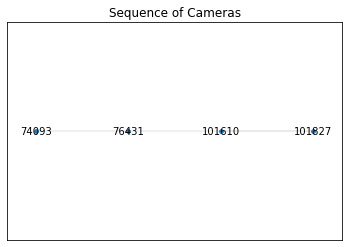

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(4)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID'] and row1['PASSDATETIME'] != 0 and row2['PASSDATETIME'] != 0:
            edge_weight = 1 / abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# مرتب‌سازی دوربین‌ها بر اساس توالی
sorted_cameras = sorted(set(df['DEVICEID']))

# ترتیب نمایش نقاط
pos = {camera: (i, 0) for i, camera in enumerate(sorted_cameras)}

# رسم گراف
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx(G, pos, with_labels=True, node_size=14, font_size=10, width=edge_weights)

plt.title('Sequence of Cameras')
plt.show()


In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv')

# حداکثر تعداد نمونه‌ها قابل نمایش
max_samples = 1000

# تعداد نمونه‌ها برای شروع
num_samples = len(df)

# تکرار تا وقتی گراف قابل نمایش باشد
while num_samples > max_samples:
    # ساخت گراف با تعداد نمونه‌های فعلی
    G = nx.Graph()

    try:
        # رسم گراف
        nx.draw(G, with_labels=True)
        plt.show()
        break
    except:
        # کاهش تعداد نمونه‌ها
        num_samples = int(num_samples * 0.9)  # می‌توانید ضریب کاهش را تغییر دهید

# نمایش تعداد نمونه‌های نهایی
print("تعداد نمونه‌ها:", num_samples)


تعداد نمونه‌ها: 950


<Figure size 432x288 with 0 Axes>

## با ۹۵۰ نمونه هم گراف قابل نمایش نبود!!!  در کد های زیر تعداد را کاهش و نمایش گراف را هم بصری تر می‌کنم

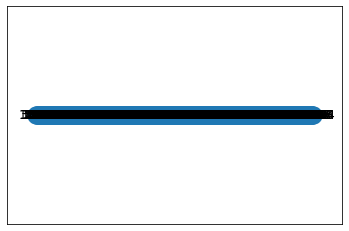

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(950)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            passdatetime_diff = abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            if passdatetime_diff != 0:
                edge_weight = 1 / passdatetime_diff
                G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# مرتب‌سازی دوربین‌ها بر اساس توالی
sorted_cameras = sorted(set(df['DEVICEID']))

# ترتیب نمایش نقاط
pos = {camera: (i, 0) for i, camera in enumerate(sorted_cameras)}

# رسم گراف
nx.draw_networkx(G, pos, with_labels=True, node_size=300, font_size=12)

# نمایش نمودار
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5768\3373213929.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')  # استفاده از نقشه رنگ Set1


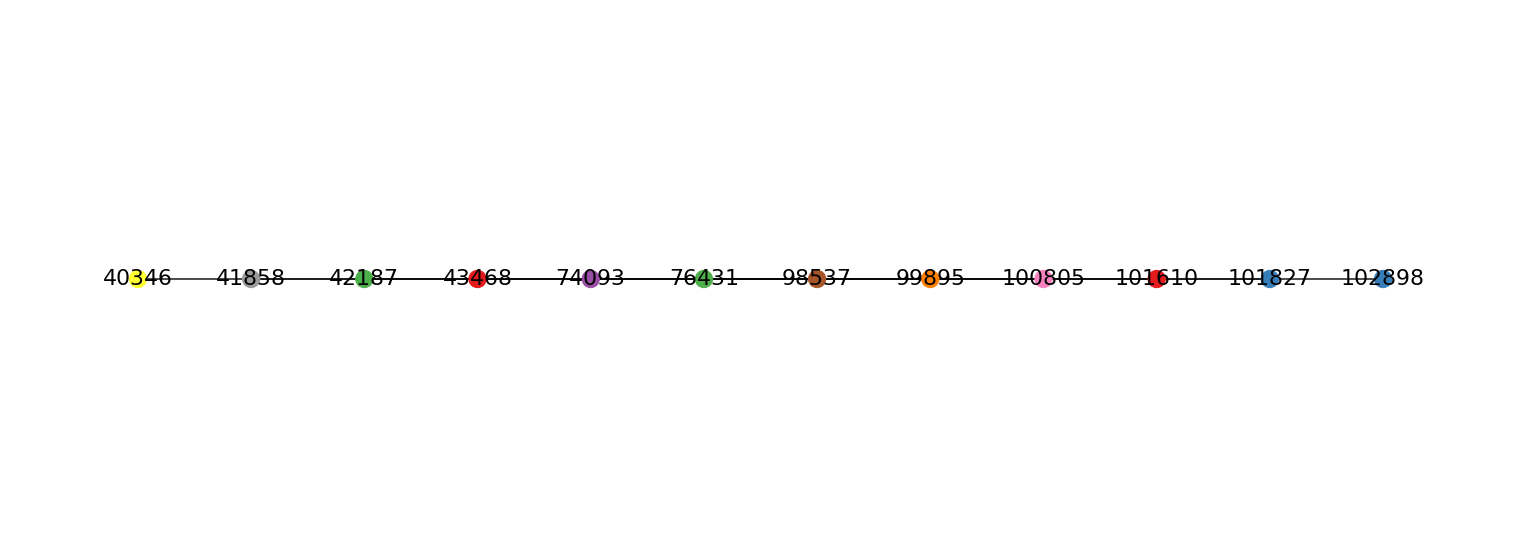

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(14)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            passdatetime_diff = abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            if passdatetime_diff != 0:
                edge_weight = 1 / passdatetime_diff
                G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# مرتب‌سازی دوربین‌ها بر اساس توالی
sorted_cameras = sorted(set(df['DEVICEID']))

# ترتیب نمایش نقاط
pos = {camera: (i, 0) for i, camera in enumerate(sorted_cameras)}

# تنظیم اندازه گراف
plt.figure(figsize=(27, 10))

# تنظیم رنگ‌ها
cmap = plt.cm.get_cmap('Set1')  # استفاده از نقشه رنگ Set1
node_colors = [cmap(i % cmap.N) for i in range(len(sorted_cameras))]

# رسم گراف با رنگ‌های غیرخطی
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)

# رسم بقیه عناصر گراف
nx.draw_networkx_edges(G, pos, width=2, alpha=0.1)
nx.draw_networkx_labels(G, pos, font_size=22)  # تنظیم اندازه فونت گره‌ها

# نمایش نمودار
plt.axis('off')
plt.show()


# نمایش گرافی از دوربین ها با وزن احتمالی روی یال ها

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5768\1218827493.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')  # استفاده از نقشه رنگ Set1


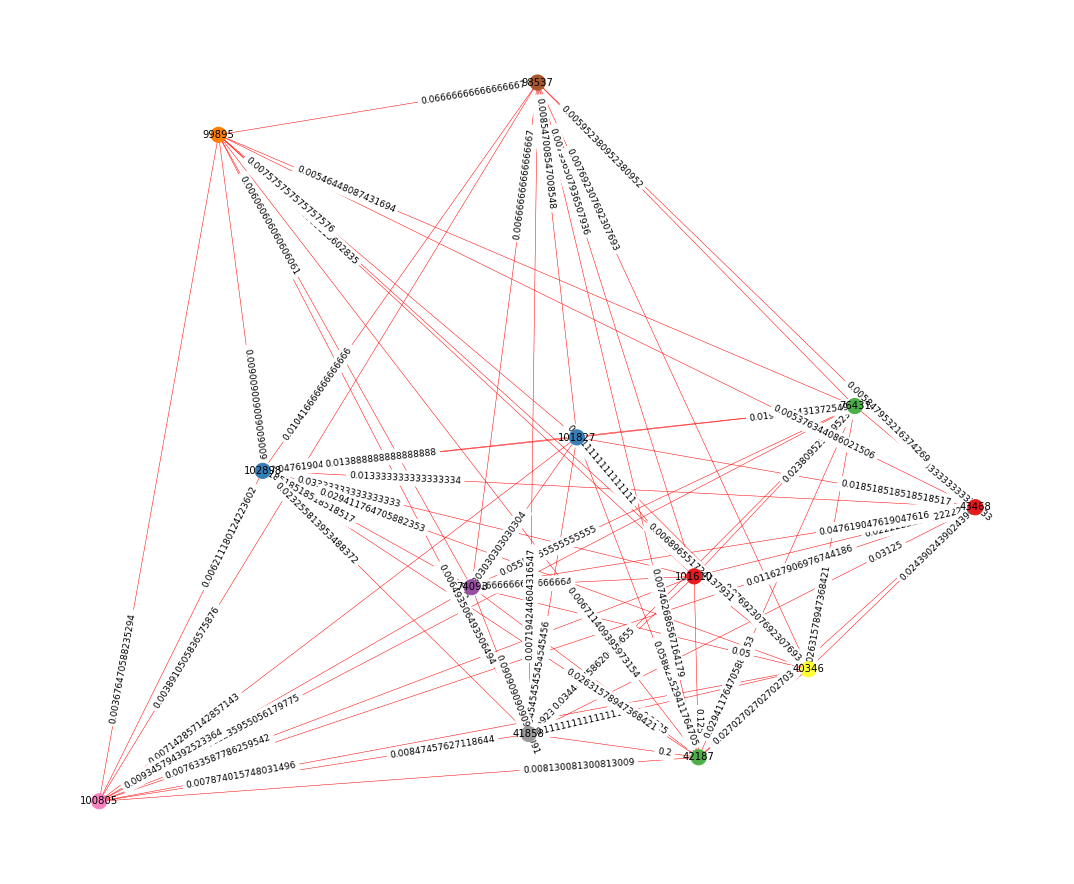

In [65]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(14)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            passdatetime_diff = abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            if passdatetime_diff != 0:
                edge_weight = 1 / passdatetime_diff
                G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# محاسبه موقعیت نمایش گراف با الگوریتم spring_layout
pos = nx.spring_layout(G)

# تنظیم اندازه گراف
plt.figure(figsize=(19, 16))

# تنظیم رنگ‌ها
cmap = plt.cm.get_cmap('Set1')  # استفاده از نقشه رنگ Set1
node_colors = [cmap(i % cmap.N) for i in range(len(G.nodes))]

# رسم گراف با رنگ‌های مرتب
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, node_size=230, font_size=10, edge_color='red', width=0.5)

# نمایش وزن احتمالی روی یال‌ها
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.2)

# نمایش نمودار
plt.axis('off')
plt.show()


# نمایش شماره دوربین ها و وزن هایشان به صورت مرتب  و واضح در جدول 

In [67]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(1309)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            passdatetime_diff = abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            if passdatetime_diff != 0:
                edge_weight = 1 / passdatetime_diff
                G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# دریافت مقادیر گره‌ها و یال‌ها
node_values = nx.get_node_attributes(G, 'weight')
edge_values = nx.get_edge_attributes(G, 'weight')

# تبدیل مقادیر به دیکشنری
node_values_dict = {str(k): v for k, v in node_values.items()}
edge_values_dict = {(str(k[0]), str(k[1])): v for k, v in edge_values.items()}

# ساخت DataFrame
node_df = pd.DataFrame.from_dict(node_values_dict, orient='index', columns=['Node Value'])
edge_df = pd.DataFrame.from_dict(edge_values_dict, orient='index', columns=['Edge Value'])

# نمایش جدول مقادیر گره‌ها و یال‌ها
print("Node Values:")
print(node_df)
print()
print("Edge Values:")
print(edge_df)


Node Values:
Empty DataFrame
Columns: [Node Value]
Index: []

Edge Values:
                  Edge Value
(101610, 101827)    0.111111
(101610, 76431)     0.025000
(101610, 74093)     0.041667
(101610, 99895)     0.007092
(101610, 40346)     0.250000
...                      ...
(103150, 101400)    0.011236
(103150, 101176)    0.011236
(103150, 81821)     1.000000
(81821, 101400)     0.011364
(81821, 101176)     0.011364

[104289 rows x 1 columns]


# مشخص کردن دوربین های دارای تردد کم و تردد زیاد

In [69]:
import pandas as pd
import networkx as nx

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv').head(1000)

# ساخت گراف
G = nx.Graph()

# افزودن یال‌ها و وزن‌های احتمالی
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if row1['DEVICEID'] != row2['DEVICEID']:
            passdatetime_diff = abs(row1['PASSDATETIME'] - row2['PASSDATETIME'])
            if passdatetime_diff != 0:
                edge_weight = 1 / passdatetime_diff
                G.add_edge(row1['DEVICEID'], row2['DEVICEID'], weight=edge_weight)

# مشخص کردن دوربین‌های دارای تردد کم و زیاد
low_traffic_cameras = []
high_traffic_cameras = []

for node in G.nodes:
    neighbors = G.neighbors(node)
    total_weight = sum(G[node][neighbor]['weight'] for neighbor in neighbors)
    if total_weight < 0.5:
        low_traffic_cameras.append(node)
    elif total_weight > 2.0:
        high_traffic_cameras.append(node)

print("دوربین‌های دارای تردد کم:")
print(low_traffic_cameras)
print()
print("دوربین‌های دارای تردد زیاد:")
print(high_traffic_cameras)


دوربین‌های دارای تردد کم:
[]

دوربین‌های دارای تردد زیاد:
[101610, 101827, 76431, 74093, 99895, 40346, 98537, 41858, 43468, 102898, 42187, 40738, 42166, 40710, 42159, 40703, 103472, 103885, 43013, 41641, 77418, 96269, 97641, 102485, 81751, 73995, 95996, 36041, 76032, 96255, 38946, 39065, 96129, 37532, 43902, 104361, 35971, 44301, 44371, 44266, 77628, 44231, 44273, 44091, 44679, 44126, 77782, 43916, 43909, 43930, 44287, 44357, 42019, 81730, 44000, 44364, 44077, 44378, 44350, 44007, 44294, 44238, 43881, 101232, 93168, 36160, 103283, 103038, 104158, 41970, 39912, 37525, 100847, 38827, 92258, 101225, 73113, 35992, 36230, 36034, 35922, 36244, 104200, 101190, 74625, 93749, 104179, 102849, 104060, 102863, 73351, 76473, 81548, 101260, 39310, 104172, 93707, 103332, 93630, 37357, 76655, 81534, 76501, 79000, 39898, 44112, 35901, 37112, 76704, 81863, 78538, 73260, 104347, 104186, 76830, 37161, 76452, 76620, 81800, 76690, 76522, 76900, 35950, 81814, 76648, 81632, 81723, 102870, 78468, 102303, 10424